In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



In [97]:
deliveries = pd.read_csv(r'C:\Users\soura\OneDrive\Desktop\Projects\IPL_Prediction\data\processed\cleaned_deliveries.csv')
matches = pd.read_csv(r'C:\Users\soura\OneDrive\Desktop\Projects\IPL_Prediction\data\processed\cleaned_matches.csv')

In [98]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,1,kolkata knight riders,royal challengers bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,1,kolkata knight riders,royal challengers bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,1,kolkata knight riders,royal challengers bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,1,kolkata knight riders,royal challengers bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,1,kolkata knight riders,royal challengers bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0


In [99]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M. Chinnaswamy Stadium,royal challengers bangalore,kolkata knight riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,kings xi punjab,chennai super kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,delhi daredevils,rajasthan royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,mumbai indians,royal challengers bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,kolkata knight riders,deccan chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0


In [100]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 119.9+ KB


In [101]:
deliveries.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   match_id      260920 non-null  int64 
 1   inning        260920 non-null  int64 
 2   batting_team  260920 non-null  object
 3   bowling_team  260920 non-null  object
 4   over          260920 non-null  int64 
 5   ball          260920 non-null  int64 
 6   batter        260920 non-null  object
 7   bowler        260920 non-null  object
 8   non_striker   260920 non-null  object
 9   batsman_runs  260920 non-null  int64 
 10  extra_runs    260920 non-null  int64 
 11  total_runs    260920 non-null  int64 
 12  is_wicket     260920 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 25.9+ MB


In [102]:
matches.describe()

,id,result_margin
count,1.095000e+03,1095.000000
mean,9.048283e+05,16.959817
std,3.677402e+05,21.714792
min,3.359820e+05,0.000000
25%,5.483315e+05,5.000000
50%,9.809610e+05,8.000000
75%,1.254062e+06,19.000000
max,1.426312e+06,146.000000


In [103]:
matches.describe(include='all')

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin
count,1.095000e+03,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095.000000
unique,NaN,17,34,823,8,292,38,19,19,19,2,20,4,NaN
top,NaN,2013,Mumbai,2008-04-26,League,AB de Villiers,Wankhede Stadium,royal challengers bangalore,mumbai indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN
freq,NaN,76,173,2,1029,25,118,135,138,143,704,144,578,NaN
mean,9.048283e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.959817
std,3.677402e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.714792
min,3.359820e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5.483315e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,9.809610e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,1.254062e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000


In [104]:
matches.set_index('id', inplace=True)

In [105]:
matches.head()

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin
id,,,,,,,,,,,,,
335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M. Chinnaswamy Stadium,royal challengers bangalore,kolkata knight riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0
335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,kings xi punjab,chennai super kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0
335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,delhi daredevils,rajasthan royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0
335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,mumbai indians,royal challengers bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0
335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,kolkata knight riders,deccan chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0


In [106]:
city_venue = matches.groupby(['city', 'venue']).size().reset_index(name='count')
city_venue

,city,venue,count
0,Abu Dhabi,Sheikh Zayed Stadium,37
1,Ahmedabad,Narendra Modi Stadium,24
2,Ahmedabad,"Sardar Patel Stadium, Motera",12
3,Bangalore,M. Chinnaswamy Stadium,94
4,Bloemfontein,OUTsurance Oval,2
5,Cape Town,Newlands,7
6,Centurion,SuperSport Park,12
7,Chandigarh,Punjab Cricket Association Stadium,61
8,Chennai,MA Chidambaram Stadium,85
9,Cuttack,Barabati Stadium,7


In [107]:
print(matches.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 335982 to 1426312
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1095 non-null   object 
 1   city             1095 non-null   object 
 2   date             1095 non-null   object 
 3   match_type       1095 non-null   object 
 4   player_of_match  1095 non-null   object 
 5   venue            1095 non-null   object 
 6   team1            1095 non-null   object 
 7   team2            1095 non-null   object 
 8   toss_winner      1095 non-null   object 
 9   toss_decision    1095 non-null   object 
 10  winner           1095 non-null   object 
 11  result           1095 non-null   object 
 12  result_margin    1095 non-null   float64
dtypes: float64(1), object(12)
memory usage: 119.8+ KB
None


In [108]:
print(matches.isnull().sum())

season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
dtype: int64


In [109]:
matches.describe()


,result_margin
count,1095.000000
mean,16.959817
std,21.714792
min,0.000000
25%,5.000000
50%,8.000000
75%,19.000000
max,146.000000


In [110]:
matches.describe(include="object")

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result
count,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095
unique,17,34,823,8,292,38,19,19,19,2,20,4
top,2013,Mumbai,2008-04-26,League,AB de Villiers,Wankhede Stadium,royal challengers bangalore,mumbai indians,Mumbai Indians,field,Mumbai Indians,wickets
freq,76,173,2,1029,25,118,135,138,143,704,144,578


C:\Users\soura\AppData\Local\Temp\ipykernel_11304\815992772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=matches["season"], palette="viridis", order=matches["season"].value_counts().index)


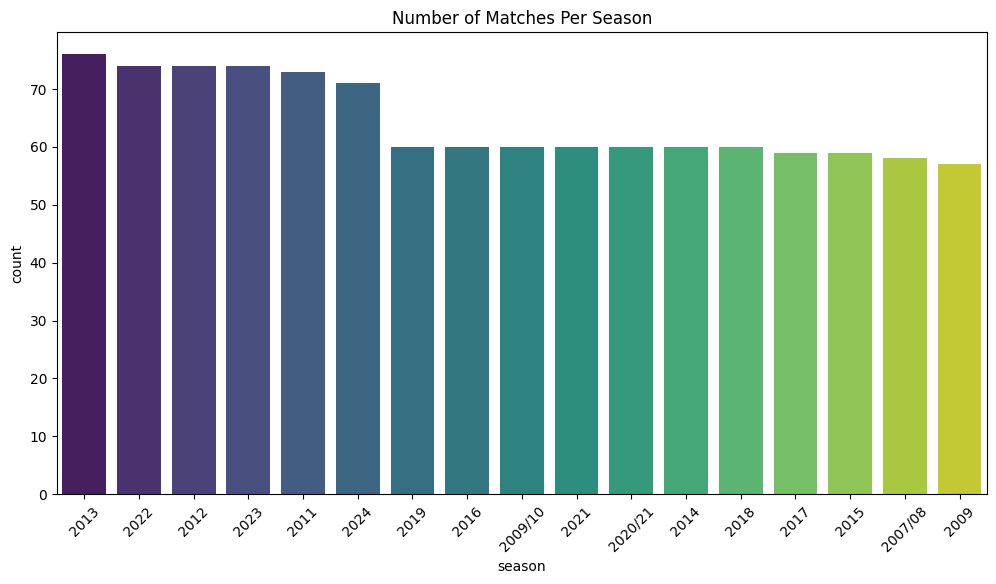

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(x=matches["season"], palette="viridis", order=matches["season"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Matches Per Season")
plt.show()


C:\Users\soura\AppData\Local\Temp\ipykernel_11304\3093589393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette="magma")


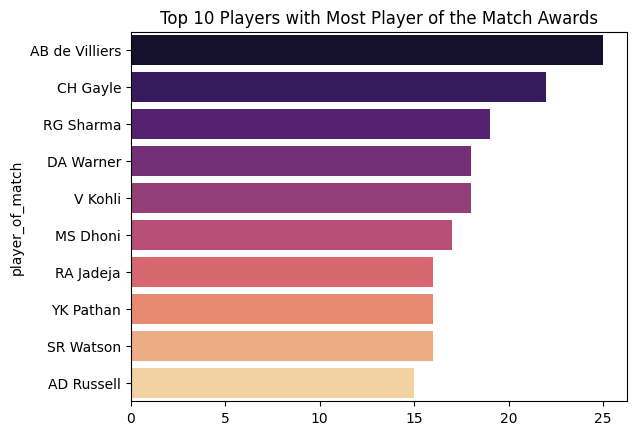

In [112]:
top_players = matches["player_of_match"].value_counts().head(10)
sns.barplot(x=top_players.values, y=top_players.index, palette="magma")
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.show()


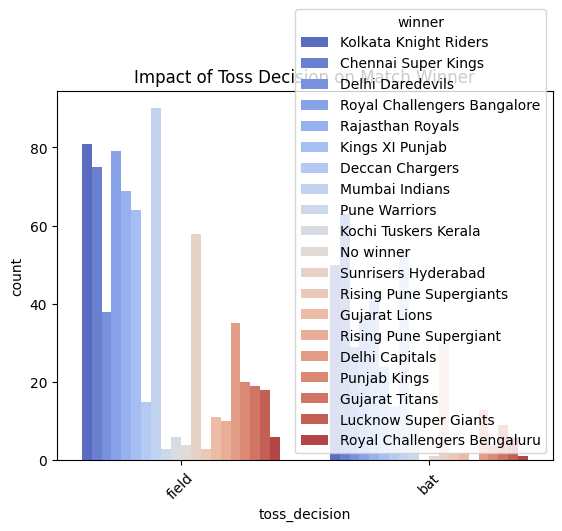

In [113]:
sns.countplot(x="toss_decision", hue="winner", data=matches, palette="coolwarm")
plt.title("Impact of Toss Decision on Match Winner")
plt.xticks(rotation=45)
plt.show()


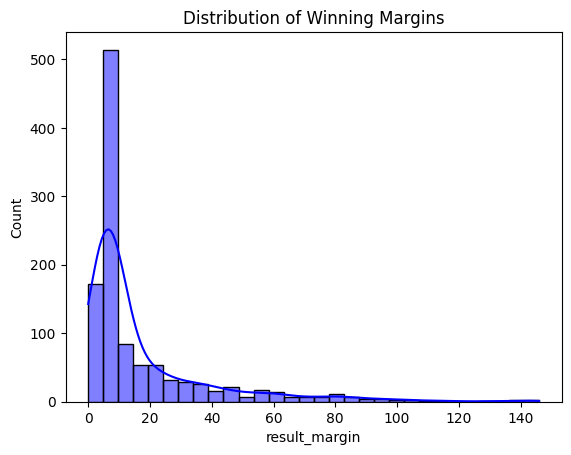

In [114]:
sns.histplot(matches["result_margin"], bins=30, kde=True, color="blue")
plt.title("Distribution of Winning Margins")
plt.show()


In [115]:
matches["toss_winner"].value_counts()


toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [116]:
toss_wins = matches[matches["toss_winner"] == matches["winner"]].shape[0]
total_matches = matches.shape[0]
print(f"Toss-winning teams won {toss_wins/total_matches:.2%} of matches.")


Toss-winning teams won 50.59% of matches.


C:\Users\soura\AppData\Local\Temp\ipykernel_11304\4073492299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="home_team_won", data=matches, palette="Set1")


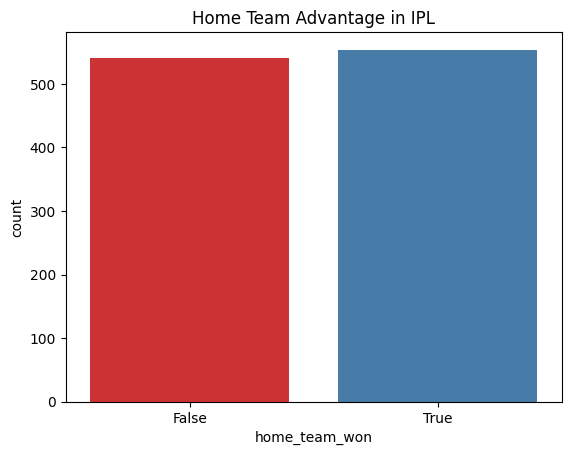

In [117]:
matches["home_team_won"] = matches["winner"] == matches["toss_winner"]
sns.countplot(x="home_team_won", data=matches, palette="Set1")
plt.title("Home Team Advantage in IPL")
plt.show()


In [118]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,1,kolkata knight riders,royal challengers bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,1,kolkata knight riders,royal challengers bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,1,kolkata knight riders,royal challengers bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,1,kolkata knight riders,royal challengers bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,1,kolkata knight riders,royal challengers bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0


In [119]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   match_id      260920 non-null  int64 
 1   inning        260920 non-null  int64 
 2   batting_team  260920 non-null  object
 3   bowling_team  260920 non-null  object
 4   over          260920 non-null  int64 
 5   ball          260920 non-null  int64 
 6   batter        260920 non-null  object
 7   bowler        260920 non-null  object
 8   non_striker   260920 non-null  object
 9   batsman_runs  260920 non-null  int64 
 10  extra_runs    260920 non-null  int64 
 11  total_runs    260920 non-null  int64 
 12  is_wicket     260920 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 25.9+ MB


C:\Users\soura\AppData\Local\Temp\ipykernel_11304\1518493115.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batters.values, y=top_batters.index, palette="magma")


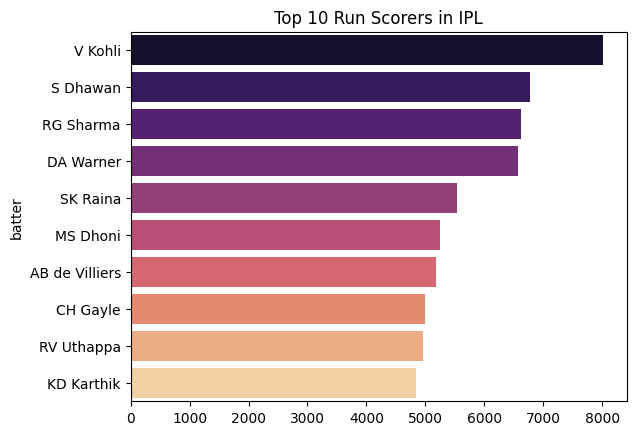

In [120]:
top_batters = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_batters.values, y=top_batters.index, palette="magma")
plt.title("Top 10 Run Scorers in IPL")
plt.show()


C:\Users\soura\AppData\Local\Temp\ipykernel_11304\388672035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_strike_rates["strike_rate"], y=top_strike_rates.index, palette="viridis")


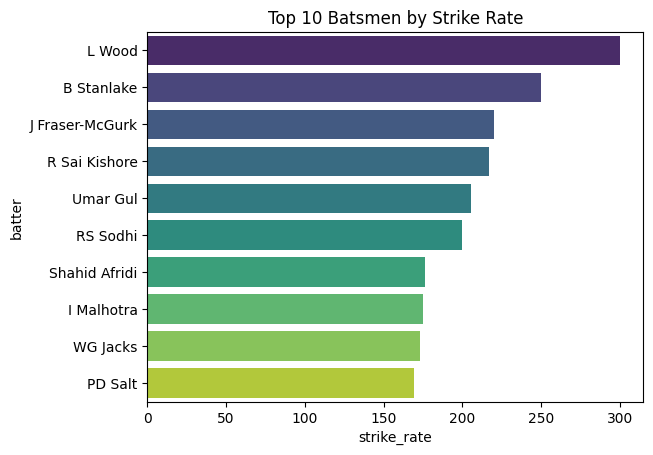

In [121]:
batsman_stats = deliveries.groupby("batter").agg({"batsman_runs": "sum", "ball": "count"})
batsman_stats["strike_rate"] = (batsman_stats["batsman_runs"] / batsman_stats["ball"]) * 100
top_strike_rates = batsman_stats.sort_values("strike_rate", ascending=False).head(10)

sns.barplot(x=top_strike_rates["strike_rate"], y=top_strike_rates.index, palette="viridis")
plt.title("Top 10 Batsmen by Strike Rate")
plt.show()


C:\Users\soura\AppData\Local\Temp\ipykernel_11304\1873948619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_economy["economy_rate"], y=top_economy.index, palette="rocket")


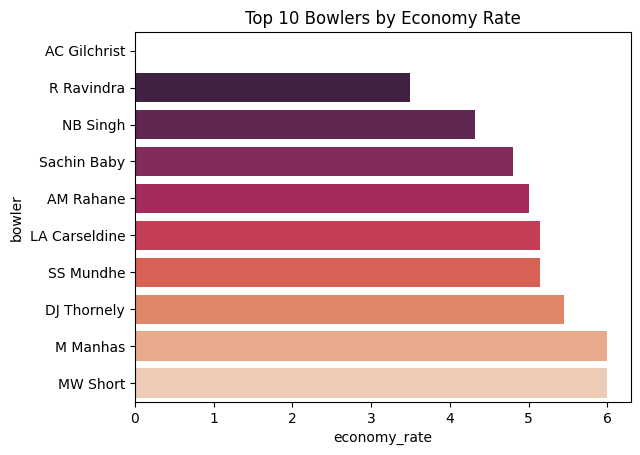

In [122]:
bowler_stats = deliveries.groupby("bowler").agg({"total_runs": "sum", "ball": "count"})
bowler_stats["economy_rate"] = (bowler_stats["total_runs"] / (bowler_stats["ball"] / 6))
top_economy = bowler_stats.sort_values("economy_rate").head(10)

sns.barplot(x=top_economy["economy_rate"], y=top_economy.index, palette="rocket")
plt.title("Top 10 Bowlers by Economy Rate")
plt.show()


In [123]:
matches.head()

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,home_team_won
id,,,,,,,,,,,,,,
335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M. Chinnaswamy Stadium,royal challengers bangalore,kolkata knight riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,False
335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,kings xi punjab,chennai super kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,True
335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,delhi daredevils,rajasthan royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,False
335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,mumbai indians,royal challengers bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,False
335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,kolkata knight riders,deccan chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,False


In [124]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,1,kolkata knight riders,royal challengers bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,1,kolkata knight riders,royal challengers bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,1,kolkata knight riders,royal challengers bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,1,kolkata knight riders,royal challengers bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,1,kolkata knight riders,royal challengers bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
